In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import tensorflow as tf
from pylab import rcParams
from main import NPHC
from scipy.linalg import inv, sqrtm, eigh, pinv
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from utils.loader import load_data
# Load Cumulants object
kernel = 'plaw_d10'
mode = 'nonsym_1'
log10T = 10
url = 'https://s3-eu-west-1.amazonaws.com/nphc-data/{}_{}_log10T{}_with_params_without_N.pkl.gz'.format(kernel, mode, log10T)
cumul, Alpha, Beta, Gamma = load_data(url)

... loading data


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


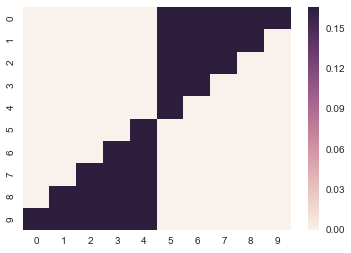

In [10]:
sns.heatmap(Alpha[::-1])

In [20]:
# Params
learning_rate = 1e1
training_epochs = 2001
display_step = 200
d = cumul.dim

In [21]:
U, s, V = np.linalg.svd(cumul.C)
sqrt_C = sqrtm(cumul.C)
sqrt_L = np.sqrt(cumul.L)
#initial = tf.ones([d,d])
initial = tf.constant(np.dot(sqrt_C,np.diag(1./sqrt_L)).astype(np.float32), shape=[d,d])
#initial = tf.constant([[float(i+j*d)/(d**2) for i in range(d)] for j in range(d)], shape=[d,d])

In [22]:
R = NPHC(cumul,initial,alpha=0.9,training_epochs=training_epochs,stochastic=False,weightGMM='eye',\
         display_step=display_step,learning_rate=learning_rate,optimizer='adam')

Epoch: 0000 log10(cost)= -10.966012001
Epoch: 0200 log10(cost)= -11.431226730
Epoch: 0400 log10(cost)= -11.598810196
Epoch: 0600 log10(cost)= -11.616513252
Epoch: 0800 log10(cost)= -11.621071815
Epoch: 1000 log10(cost)= -11.622076988
Epoch: 1200 log10(cost)= -11.622263908
Epoch: 1400 log10(cost)= -11.622304916
Epoch: 1600 log10(cost)= -11.622315407
Epoch: 1800 log10(cost)= -11.622317314
Epoch: 2000 log10(cost)= -11.622317314
Optimization Finished!


In [23]:
initial = tf.constant(R,shape=[d,d])

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


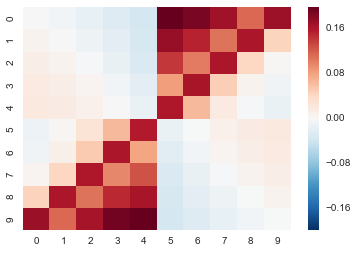

In [24]:
from scipy.linalg import inv
G = np.eye(R.shape[0]) - inv(R)
#G[G<.5*np.max(G)]=0
sns.heatmap(G[::-1])

In [25]:
import gzip, pickle
f = gzip.open('results.pkl.gz','rb')
L, results = pickle.load(f)
f.close()

('plaw_d10', 'nonsym_1', 10)


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


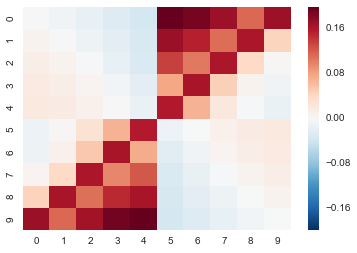

In [35]:
i = 6
print(L[i])
R = results[i]
from scipy.linalg import inv
G = np.eye(R.shape[0]) - inv(R)
#G[G<.5*np.max(G)]=0
sns.heatmap(G[::-1])